In [1]:
#Day 4 — Week 2: Cross-Validation, Polynomial Regression & Residual Analysis

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Load your dataset
df = pd.read_csv("..\\datasets\\student-por.csv")

# Select relevant numeric features
X = df[['studytime', 'failures', 'traveltime', 'freetime', 'Walc','absences','Medu','Fedu','health','Dalc']]
y = df['G3']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5, scoring='r2')  # 5-fold CV

print("R² scores for each fold:", scores)
print("Mean R²:", np.mean(scores))


R² scores for each fold: [-0.13416601  0.18681649  0.1171706   0.22256959  0.09566886]
Mean R²: 0.09761190414981394


In [6]:
#Polynomial Regression

Polynomial Regression RMSE: 2.864565258181631
Polynomial Regression R²: 0.15853434018202117


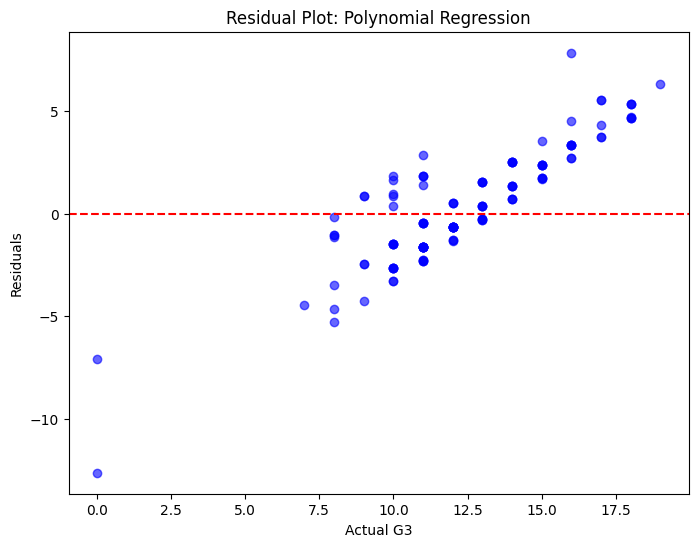

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Load your dataset
df = pd.read_csv("..\\datasets\\student-por.csv")

# Select features
X_poly = df[['studytime', 'failures']]
y = df['G3']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Create polynomial regression model (degree 2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)

# Predict
y_pred_poly = poly_model.predict(X_test)

# Evaluate
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression RMSE:", rmse_poly)
print("Polynomial Regression R²:", r2_poly)

import matplotlib.pyplot as plt

# Residuals = Actual - Predicted
residuals = y_test - y_pred_poly
plt.figure(figsize=(8,6))
plt.scatter(y_test, residuals, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')  # reference line at 0
plt.xlabel("Actual G3")
plt.ylabel("Residuals")
plt.title("Residual Plot: Polynomial Regression")
plt.show()

